<a href="https://colab.research.google.com/github/KeidSousa/depoimentos-csv/blob/main/exercicio_analise%20temp_marab%C3%A1%2080-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [16]:
# prompt: ler arquivo excel

planilha = pd.read_excel('/content/Data_TEMP_MAB80_20.xlsx')
planilha

,DATA,Média Máxima,Ano,Mes
0,1980-01-31,29.9,1980,J
1,1980-02-29,29.2,1980,F
2,1980-03-31,31.4,1980,M
3,1980-04-30,0.0,1980,A
4,1980-05-31,32.3,1980,M
...,...,...,...,...
487,2020-08-31,0.0,2020,A
488,2020-09-30,0.0,2020,S
489,2020-10-31,0.0,2020,O
490,2020-11-30,0.0,2020,N


In [17]:
# prompt: tipos de variaveis

for i in planilha.columns:
  print(f'A coluna {i} é do tipo {planilha[i].dtype}')

A coluna DATA é do tipo object
A coluna Média Máxima é do tipo float64
A coluna Ano é do tipo int64
A coluna Mes é do tipo object


In [18]:
planilha

,DATA,Média Máxima,Ano,Mes
0,1980-01-31,29.9,1980,J
1,1980-02-29,29.2,1980,F
2,1980-03-31,31.4,1980,M
3,1980-04-30,0.0,1980,A
4,1980-05-31,32.3,1980,M
...,...,...,...,...
487,2020-08-31,0.0,2020,A
488,2020-09-30,0.0,2020,S
489,2020-10-31,0.0,2020,O
490,2020-11-30,0.0,2020,N


In [19]:
# prompt: Usando o DataFrame planilha: grafico temporal

import altair as alt
# Convert the 'DATA' column to datetime objects
planilha['DATA'] = pd.to_datetime(planilha['DATA'])
# Create a time series chart using Altair
chart = alt.Chart(planilha).mark_line().encode(
    x='DATA:T',  # Use 'DATA' column for the x-axis, specifying temporal type
    y='Média Máxima:Q' # Use 'Média Máxima' column for the y-axis, specifying quantitative type
).properties(
    title='Média Máxima Over Time' # Add a title to the chart
)
# Display the chart
chart

alt.Chart(...)

In [20]:
# prompt: excluir zeros

# Assuming 'Média Máxima' is the column you want to filter
planilha_filtered = planilha[planilha['Média Máxima'] != 0].copy()

# You can now use planilha_filtered for plotting or further analysis
# For example, to recreate the chart without zeros:
chart_filtered = alt.Chart(planilha_filtered).mark_line().encode(
    x='DATA:T',
    y='Média Máxima:Q'
).properties(
    title='Média Máxima Over Time (Excluding Zeros)'
)

# Display the filtered chart
chart_filtered

alt.Chart(...)

In [21]:
# prompt: inserir jitter no grafico

# Create a scatter plot with jitter
chart_jitter = alt.Chart(planilha_filtered).mark_circle(opacity=0.5).encode(
    x=alt.X('DATA:T', axis=alt.Axis(format='%Y-%m-%d')),  # Use 'DATA' column for x-axis with date format
    y=alt.Y('Média Máxima:Q', axis=alt.Axis(title='Média Máxima')), # Use 'Média Máxima' for y-axis
    tooltip=['DATA:T', 'Média Máxima:Q']
).properties(
    title='Média Máxima Over Time (Excluding Zeros) with Jitter'
).interactive() # Make the chart interactive

# Display the scatter plot with jitter
chart_jitter


alt.Chart(...)

In [23]:
# prompt: mudar o valor minimo no eixo y

chart_filtered = alt.Chart(planilha_filtered).mark_line().encode(
    x='DATA:T',
    y=alt.Y('Média Máxima:Q', scale=alt.Scale(domainMin=28)) # Set minimum value of y-axis to 15
).properties(
    title='Média Máxima Over Time (Excluding Zeros)'
)

# Display the filtered chart
chart_filtered


alt.Chart(...)

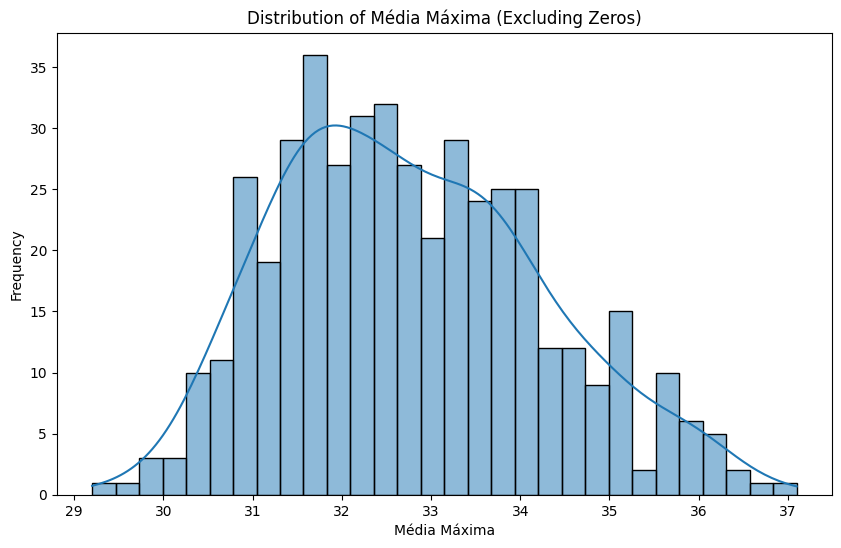

<Figure size 1200x600 with 0 Axes>

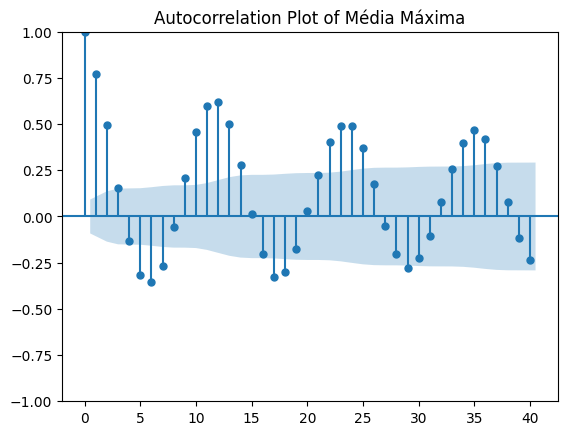

<Figure size 1200x600 with 0 Axes>

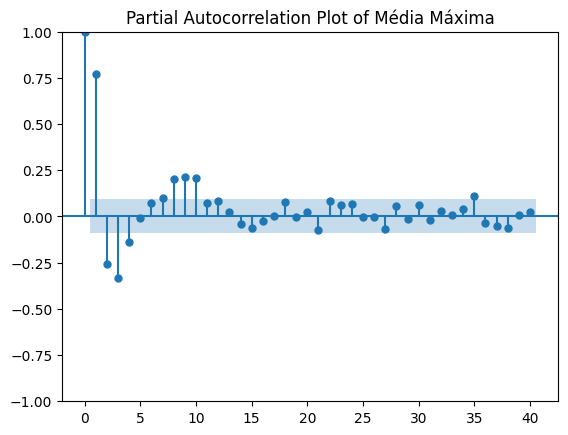

In [24]:
# prompt: realizar uma analise de serie temporal

# Plotting a histogram of the 'Média Máxima' column
plt.figure(figsize=(10, 6))
sn.histplot(planilha_filtered['Média Máxima'], kde=True, bins=30)
plt.title('Distribution of Média Máxima (Excluding Zeros)')
plt.xlabel('Média Máxima')
plt.ylabel('Frequency')
plt.show()

# Analyzing trends with rolling mean
planilha_filtered['Média Máxima Rolante'] = planilha_filtered['Média Máxima'].rolling(window=30).mean()

chart_rolling = alt.Chart(planilha_filtered).mark_line().encode(
    x='DATA:T',
    y='Média Máxima Rolante:Q'
).properties(
    title='Rolling Mean of Média Máxima (Excluding Zeros)'
)
chart_rolling

# Decomposing the time series (if possible, requires more data points and potentially resampling)
# As an example, demonstrating how to set the index for potential future decomposition
planilha_filtered_indexed = planilha_filtered.set_index('DATA')
# Now planilha_filtered_indexed can be used for time series decomposition if the data is suitable.
# For example:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(planilha_filtered_indexed['Média Máxima'], model='additive')
# decomposition.plot()
# plt.show()

# Autocorrelation plot to check for seasonality
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(planilha_filtered_indexed['Média Máxima'].dropna(), lags=40) # Dropna is important as rolling mean creates NaNs
plt.title('Autocorrelation Plot of Média Máxima')
plt.show()

# Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12, 6))
plot_pacf(planilha_filtered_indexed['Média Máxima'].dropna(), lags=40)
plt.title('Partial Autocorrelation Plot of Média Máxima')
plt.show()

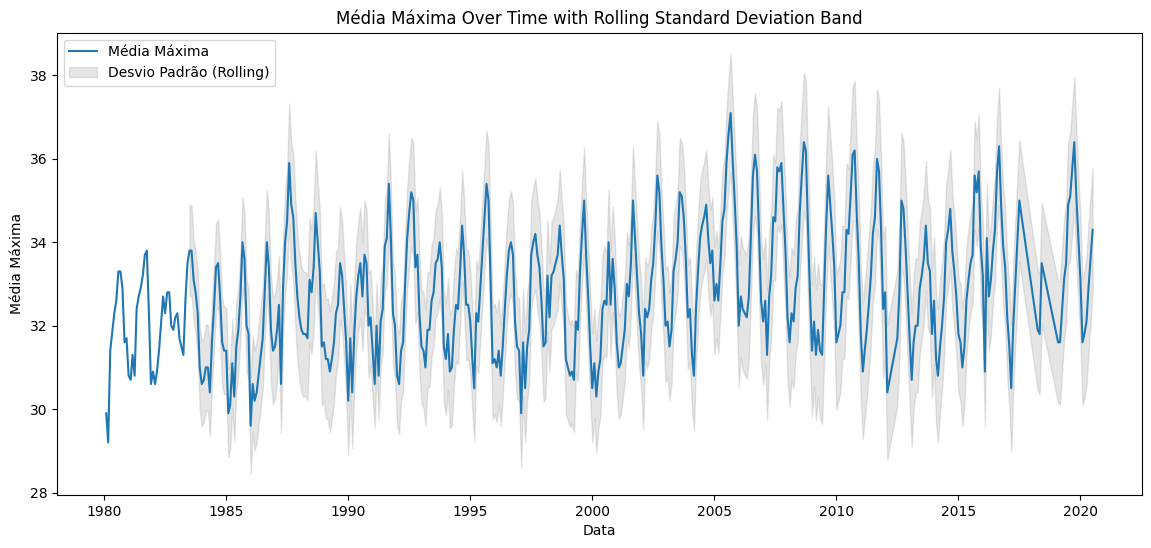

In [30]:
# prompt: fazer um gráfico de linhas com desvio padrão

# Create a line plot with standard deviation band
plt.figure(figsize=(14, 6))

# Plot the mean line
plt.plot(planilha_filtered['DATA'], planilha_filtered['Média Máxima'], label='Média Máxima')

# Calculate the rolling standard deviation
planilha_filtered['Std_Dev'] = planilha_filtered['Média Máxima'].rolling(window=40).std() # Use the same window as rolling mean

# Calculate the upper and lower bounds for the standard deviation band
planilha_filtered['Upper_Bound'] = planilha_filtered['Média Máxima'] + planilha_filtered['Std_Dev']
planilha_filtered['Lower_Bound'] = planilha_filtered['Média Máxima'] - planilha_filtered['Std_Dev']

# Plot the standard deviation band using fill_between
plt.fill_between(planilha_filtered['DATA'], planilha_filtered['Lower_Bound'], planilha_filtered['Upper_Bound'], color='gray', alpha=0.2, label='Desvio Padrão (Rolling)')

plt.title('Média Máxima Over Time with Rolling Standard Deviation Band')
plt.xlabel('Data')
plt.ylabel('Média Máxima')
plt.legend()
plt.grid(False)
plt.show()

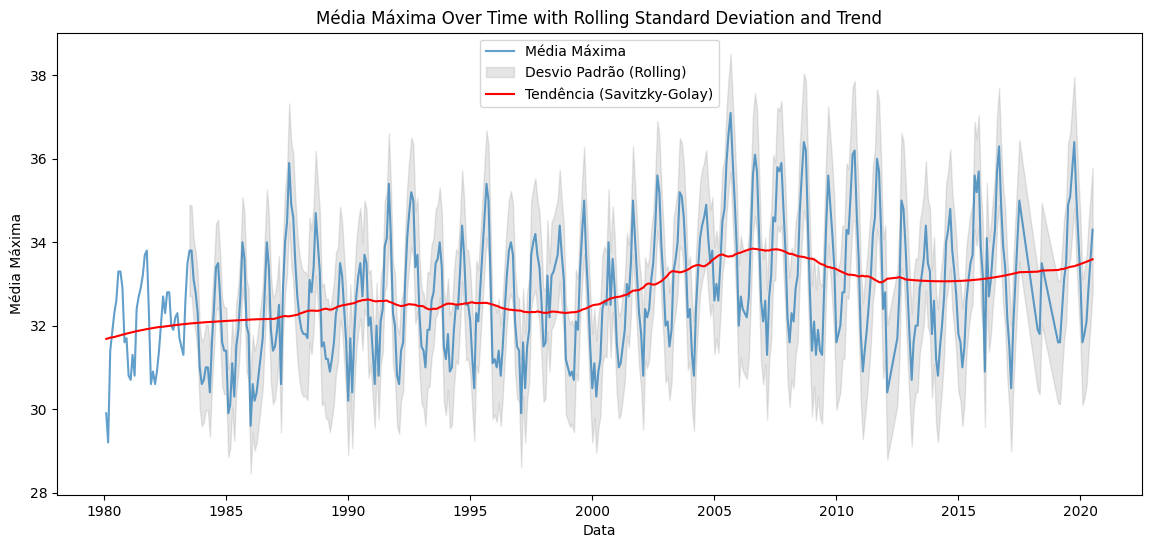

In [32]:
# prompt: fazer um gráfico de linhas com desvio padrão e tendencia linear

import numpy as np
from scipy.signal import savgol_filter

# Calculate a smoothed trend using a Savitzky-Golay filter
window_size = 151  # Choose an appropriate window size (must be odd)
poly_order = 3      # Choose an appropriate polynomial order

# Apply the filter, handling potential NaNs introduced by rolling calculations
# We only apply the filter to the non-NaN values in 'Média Máxima'
planilha_filtered['Trend'] = np.nan
non_nan_indices = planilha_filtered['Média Máxima'].dropna().index
planilha_filtered.loc[non_nan_indices, 'Trend'] = savgol_filter(planilha_filtered.loc[non_nan_indices, 'Média Máxima'], window_size, poly_order)

plt.figure(figsize=(14, 6))

# Plot the mean line
plt.plot(planilha_filtered['DATA'], planilha_filtered['Média Máxima'], label='Média Máxima', alpha=0.7)

# Plot the standard deviation band using fill_between
plt.fill_between(planilha_filtered['DATA'], planilha_filtered['Lower_Bound'], planilha_filtered['Upper_Bound'], color='gray', alpha=0.2, label='Desvio Padrão (Rolling)')

# Plot the trend line
plt.plot(planilha_filtered['DATA'], planilha_filtered['Trend'], color='red', linestyle='-', label='Tendência (Savitzky-Golay)')

plt.title('Média Máxima Over Time with Rolling Standard Deviation and Trend')
plt.xlabel('Data')
plt.ylabel('Média Máxima')
plt.legend()
plt.grid(False)
plt.show()


Linear Trend Equation: y = 0.0037x + 31.9291


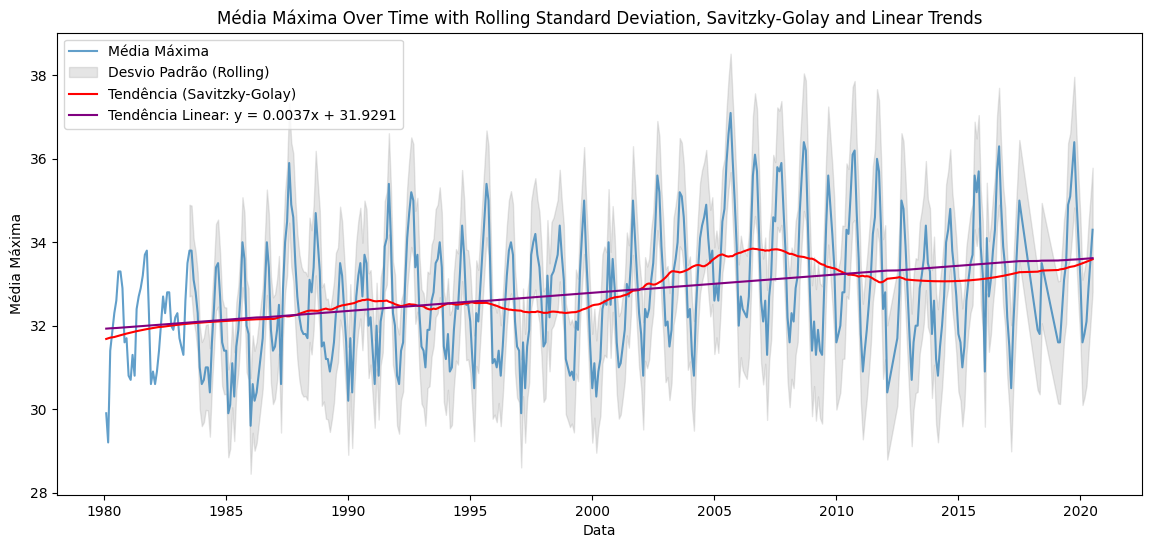

In [44]:
# prompt: inserir tendencia linear e equação

from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# For linear regression, we need numerical data for the x-axis.
# We can convert the 'DATA' column to timestamps or simply use the index.
# Using the index as the numerical representation of time
X = np.arange(len(planilha_filtered)).reshape(-1, 1)
y = planilha_filtered['Média Máxima'].dropna() # Use non-NaN 'Média Máxima' values

# Filter X to match the length of y
X = X[planilha_filtered['Média Máxima'].notna()]

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the trend line
planilha_filtered['Linear_Trend'] = np.nan # Initialize a new column for linear trend
# Predict for the original indices of the non-NaN values
planilha_filtered.loc[planilha_filtered['Média Máxima'].notna(), 'Linear_Trend'] = model.predict(X)


# Get the equation of the line: y = mx + c
# m is the coefficient (slope), c is the intercept
slope = model.coef_[0]
intercept = model.intercept_

# The equation of the line
equation = f'y = {slope:.4f}x + {intercept:.4f}'
print(f'Linear Trend Equation: {equation}')

# Plotting
plt.figure(figsize=(14, 6))

# Plot the original 'Média Máxima' data
plt.plot(planilha_filtered['DATA'], planilha_filtered['Média Máxima'], label='Média Máxima', alpha=0.7)

# Plot the rolling standard deviation band
plt.fill_between(planilha_filtered['DATA'], planilha_filtered['Lower_Bound'], planilha_filtered['Upper_Bound'], color='gray', alpha=0.2, label='Desvio Padrão (Rolling)')

# Plot the Savitzky-Golay trend line
plt.plot(planilha_filtered['DATA'], planilha_filtered['Trend'], color='red', linestyle='-', label='Tendência (Savitzky-Golay)')

# Plot the linear trend line
plt.plot(planilha_filtered['DATA'], planilha_filtered['Linear_Trend'], color='purple', linestyle='-', label=f'Tendência Linear: {equation}')

plt.title('Média Máxima Over Time with Rolling Standard Deviation, Savitzky-Golay and Linear Trends')
plt.xlabel('Data')
plt.ylabel('Média Máxima')
plt.legend()
plt.grid(False)
plt.show()


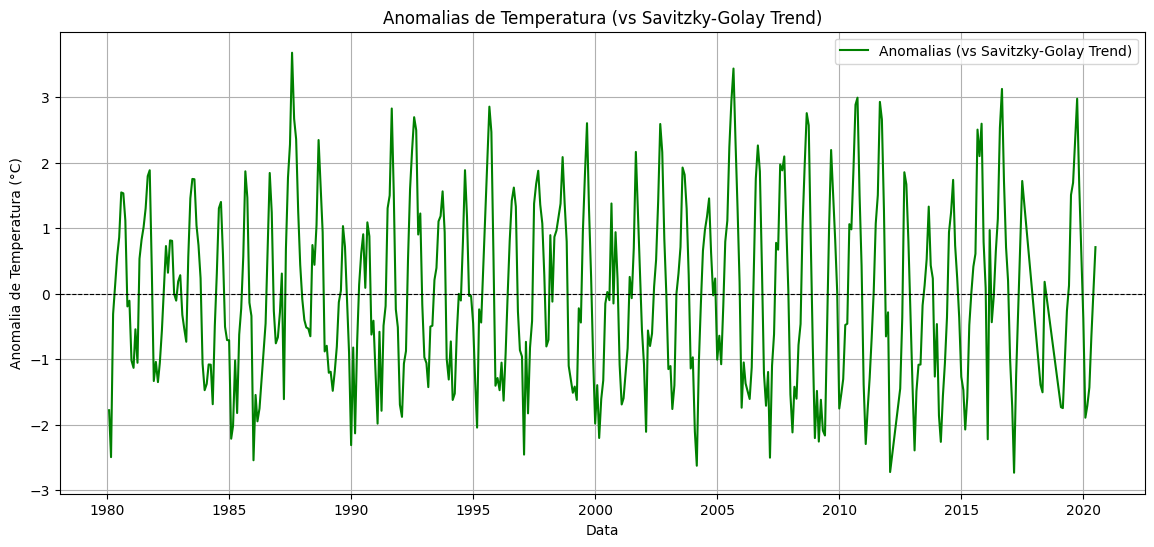

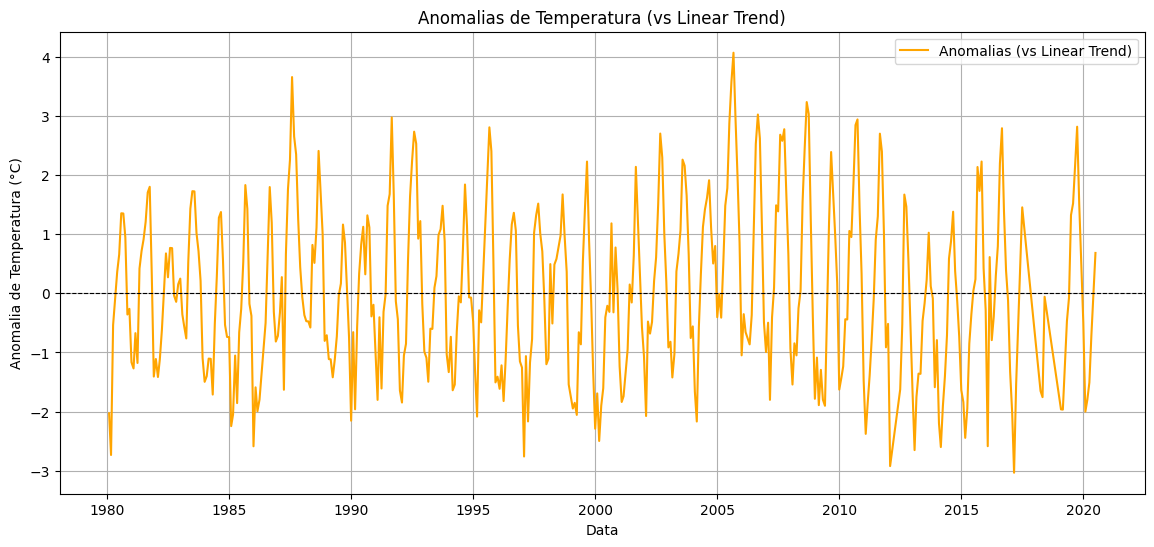

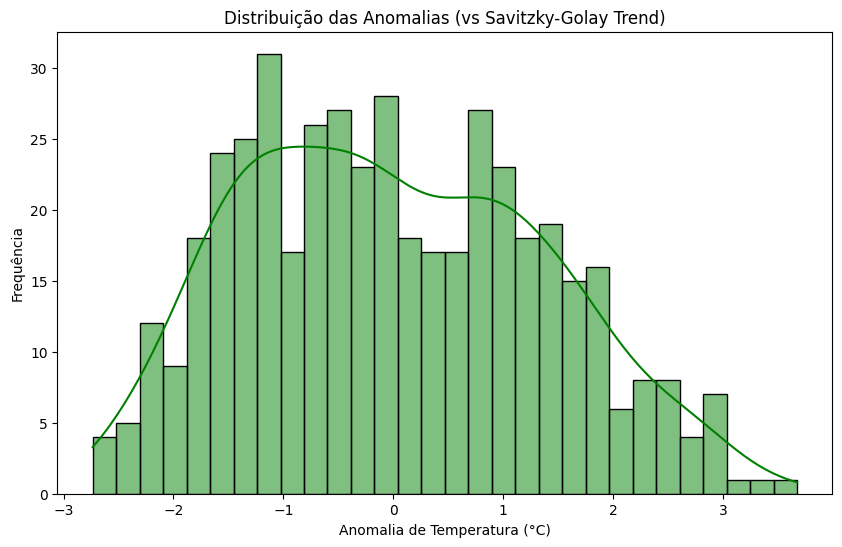

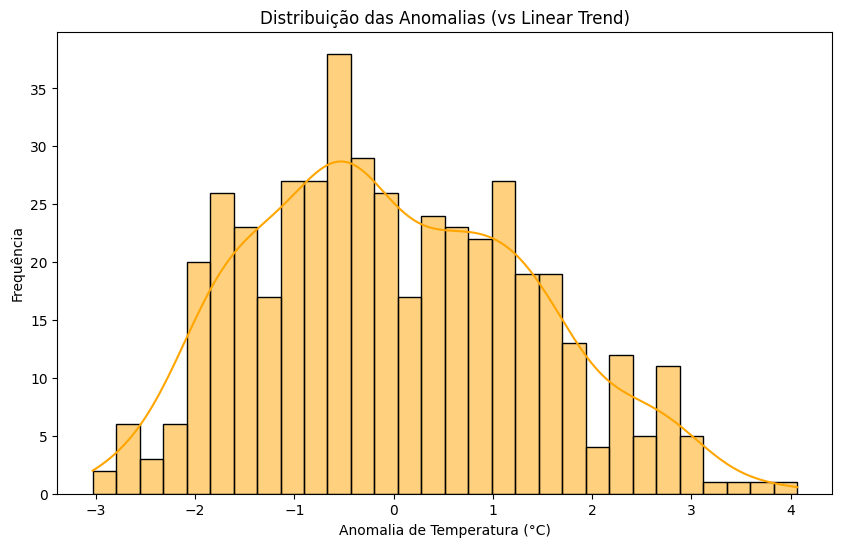

In [46]:
# prompt: inserir anomalias de temperatura

# Calculate anomalies as the difference between the observed value and the smoothed trend
# Using the Savitzky-Golay trend for calculating anomalies
planilha_filtered['Anomaly_Savitzky'] = planilha_filtered['Média Máxima'] - planilha_filtered['Trend']

# Plotting the anomalies
plt.figure(figsize=(14, 6))
plt.plot(planilha_filtered['DATA'], planilha_filtered['Anomaly_Savitzky'], label='Anomalias (vs Savitzky-Golay Trend)', color='green')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

plt.title('Anomalias de Temperatura (vs Savitzky-Golay Trend)')
plt.xlabel('Data')
plt.ylabel('Anomalia de Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate anomalies against the linear trend as well
planilha_filtered['Anomaly_Linear'] = planilha_filtered['Média Máxima'] - planilha_filtered['Linear_Trend']

# Plotting anomalies against the linear trend
plt.figure(figsize=(14, 6))
plt.plot(planilha_filtered['DATA'], planilha_filtered['Anomaly_Linear'], label='Anomalias (vs Linear Trend)', color='orange')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

plt.title('Anomalias de Temperatura (vs Linear Trend)')
plt.xlabel('Data')
plt.ylabel('Anomalia de Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# You can also look at the distribution of anomalies
plt.figure(figsize=(10, 6))
sn.histplot(planilha_filtered['Anomaly_Savitzky'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribuição das Anomalias (vs Savitzky-Golay Trend)')
plt.xlabel('Anomalia de Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sn.histplot(planilha_filtered['Anomaly_Linear'].dropna(), kde=True, bins=30, color='orange')
plt.title('Distribuição das Anomalias (vs Linear Trend)')
plt.xlabel('Anomalia de Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()
